In [1]:
# Generate an imbalanced dataset with 100 nodes
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

X, y = make_classification(n_classes = 2, class_sep = 2,
                           weights = [0.9, 0.1], n_informative = 2,
                           n_redundant = 0, flip_y = 0,
                           n_features = 2, n_clusters_per_class = 1,
                           n_samples = 100, random_state =1)
print(X)
print(y)
print(Counter(y))

[[ 2.028469    2.15493057]
 [ 1.8780991   1.89551051]
 [ 1.95928819  2.03967316]
 [ 1.85540524  1.91847306]
 [ 2.02033884  1.9013754 ]
 [ 2.02265244  1.45002601]
 [ 1.82178321  2.18947778]
 [ 1.99022704  2.30770407]
 [ 1.77151441  1.345716  ]
 [ 1.96204707  1.07387437]
 [ 2.17456965  1.69211449]
 [ 1.82798737  1.84806927]
 [ 1.89189141  1.87699465]
 [ 1.90394545  1.35413361]
 [ 1.94459507  2.12641981]
 [ 1.9317172   1.78344054]
 [-1.96853969  2.27991386]
 [-2.09230828  1.92686981]
 [ 1.96382943  1.38678485]
 [ 2.29201903  2.36777271]
 [ 1.88204891  1.88077129]
 [ 2.32970299  2.58463774]
 [ 1.86500087  2.28655987]
 [ 2.01313574  2.16777676]
 [ 2.22382712  2.98519313]
 [ 2.03332877  2.41783017]
 [ 1.96435056  2.77547698]
 [ 2.02600767  1.87226739]
 [ 2.10863359  2.16755486]
 [ 2.12550154  2.08060284]
 [ 2.1529768   2.44764661]
 [-2.278618    1.98379959]
 [ 2.03607875  2.06828   ]
 [ 1.91588404  1.79032389]
 [ 2.13872896  1.85729649]
 [-2.01366961  1.47330777]
 [ 1.84917607  2.36586461]
 

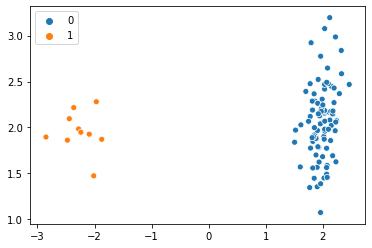

In [2]:
plt.figure()
sns.scatterplot(X[:,0], X[:,1], hue = y)
plt.show()

In [3]:
from sklearn import tree
from sklearn.metrics import confusion_matrix

clf = tree.DecisionTreeClassifier()
clf.fit(X,y)
y_pred = clf.predict(X)
conf_matrix = confusion_matrix(y, y_pred)
conf_matrix

array([[90,  0],
       [ 0, 10]], dtype=int64)

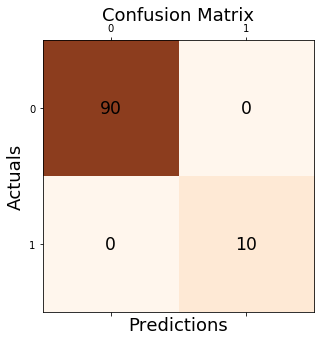

In [4]:
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.9)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [5]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y, y_pred)

(array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([90, 10], dtype=int64))

In [6]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report # combination of above
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        10

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



# Lets do it again with Iris dataset

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split # randomly split data to training and testing data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [8]:
from sklearn import tree
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)

y_pred = clf.predict(X)
print("clf.score = ", clf.score(X, y))
print("AC = ", accuracy_score(y_pred, y))

clf.score =  1.0
AC =  1.0


In [9]:
conf_matrix = confusion_matrix(y, y_pred)
conf_matrix

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

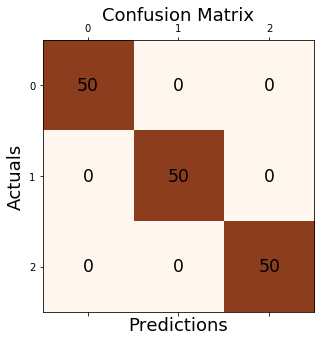

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.9)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [11]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [12]:
# Decision Tree (Split data randomly 80% vs. 20%)
from sklearn import tree
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.2, random_state=71) #train_size = 0.8

clf = tree.DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
print("Train clf.score = ", clf.score(X_train, y_train))
print("Train AC = ", accuracy_score(y_train_pred, y_train))
print()

y_test_pred = clf.predict(X_test)
print("Test clf.score = ", clf.score(X_test, y_test))
print("Test AC = ", accuracy_score(y_test_pred, y_test))

Train clf.score =  1.0
Train AC =  1.0

Test clf.score =  0.9333333333333333
Test AC =  0.9333333333333333


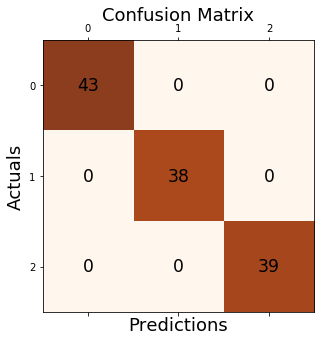

In [13]:
# for training data
conf_matrix = confusion_matrix(y_train_pred, y_train)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.9)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [14]:
print(classification_report(y_train_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



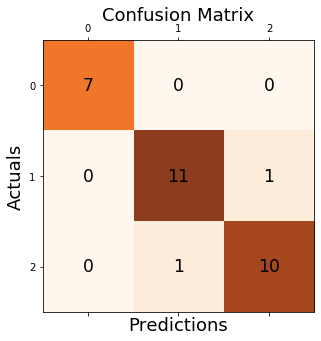

In [15]:
# for testing data
conf_matrix = confusion_matrix(y_test_pred, y_test)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.9)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [16]:
print(classification_report(y_test_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      0.92      0.92        12
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



# Please try to change DT to other 7 classification models for practice